# Credit Card Fraud Detection Project

The Credit Card Fraud Detection System is a Python-based security system designed to identify and prevent fraudulent credit card transactions. It uses two-factor authentication (OTP verification) for admin login and allows admins to request payments by entering necessary details. The system automatically flags or declines transactions based on specific fraud detection rules. These rules include detecting unusual transaction patterns, mismatched addresses, excessive usage of a credit card, and suspicious customer details. Admins can review flagged transactions and update their status to prevent unnecessary blocking of legitimate users. The goal of the system is to enhance security, prevent financial losses, and ensure smooth payment processing.

# Problem Statement

Credit card fraud is a major issue that leads to financial losses for businesses and individuals. Fraudsters use stolen card details to make unauthorized transactions, often bypassing standard security checks. This system aims to detect and prevent suspicious transactions by analyzing user behavior, transaction patterns, and anomalies such as multiple card usage, unusual purchase amounts, and mismatched billing details. By flagging or declining high-risk transactions, the system helps reduce fraud while allowing genuine transactions to proceed smoothly.

# Import Libraries 

In [8]:
pip install sklearn-genetic-opt

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn_genetic import GASearchCV

In [10]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [11]:
import sys
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [12]:
import platform
print(platform.python_version())

3.12.4


In [13]:
pip install xgboost

In [16]:
#data preprocessing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning dependencies
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier

In [17]:
import pandas as pd

# Load the dataset
file_path = r"D:\User\Saru\creditcard.csv"  # Use 'r' before the path to avoid errors
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
print(f"No. of rows in the dataset ==>> {df.shape[0]}")
print(f"No. of columns in the dataset ==>> {df.shape[1]}")

No. of rows in the dataset ==>> 284807
No. of columns in the dataset ==>> 31


In [19]:
df.head(n=3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [20]:
print("the name of the columns in the dataset are : ")
df.columns

the name of the columns in the dataset are : 


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# dropping time column

In [22]:
df.drop(["Time"],axis=1,inplace=True)

In [23]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [24]:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [25]:
df_fraud=df[df.Class==1]
df_true=df[df.Class==0]
df_true=df_true.sample(frac=0.5)
data=pd.concat([df_true,df_fraud])
data = data.reset_index(drop=True)
data.shape

(142650, 30)

In [26]:
data['Amount'].describe()

count    142650.000000
mean         87.894303
std         237.803511
min           0.000000
25%           5.680000
50%          21.940000
75%          76.900000
max       12910.930000
Name: Amount, dtype: float64

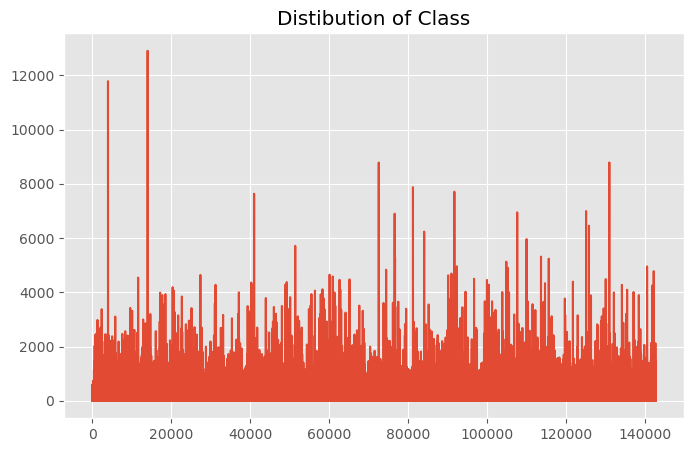

In [27]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class")
    plt.plot(data["Amount"])
    plt.show()

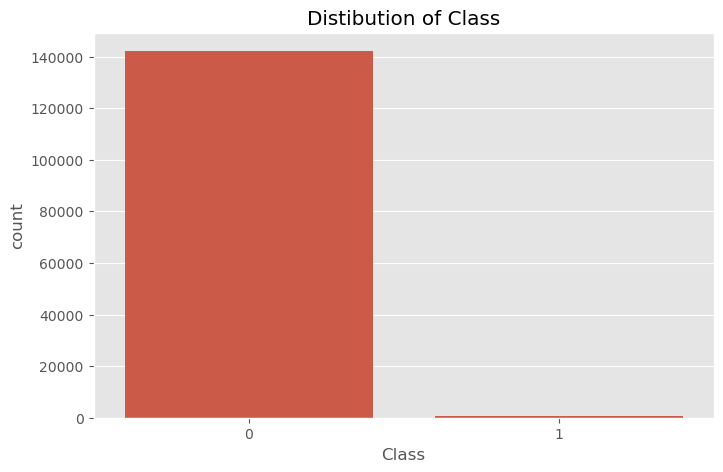

In [28]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class")
    sns.countplot(data=data,x=data["Class"])
    plt.show()

In [ ]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["green", "red"])
plt.xticks([0, 1], ["Legit (0)", "Fraud (1)"])
plt.ylabel("Percentage")
plt.title("Class Distribution in Credit Card Fraud Dataset")
plt.show()


# what is the precentage of fraud transactions ?

In [30]:
fraud_per=round((len(df[df.Class==1])/len(df[df.Class==0]))*100,2)
print(f"The percentage of fraud transactions is {fraud_per} %")

The percentage of fraud transactions is 0.17 %


# scaling the Amount column with standard scaling process

In [32]:
sc=StandardScaler()
data.Amount=sc.fit_transform(data.Amount.values.reshape(-1,1))

# Amount column after transformation

In [34]:
data.Amount

0         1.165402
1         0.088753
2        -0.361284
3         1.017254
4        -0.306533
            ...   
142645    1.270405
142646   -0.366414
142647   -0.042070
142648    0.660656
142649   -0.190764
Name: Amount, Length: 142650, dtype: float64

In [35]:
data.drop_duplicates(inplace=True)

In [36]:
data.shape

(139568, 30)

Train- Test Split

In [38]:
x=data.drop(["Class"],axis=1)
y=data["Class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

LogisticRegression

In [40]:
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_pred_log=model_log.predict(x_test)
print(f"The accuracy of the model is {round(model_log.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.83%


F1 Score -Logistic Regression

In [42]:
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_log),2)}")

F1-Score of the model is 0.69


In [ ]:
print(f"The accuracy of the model is {round(model_xgb.score(x_test,y_test)*100,2)}%")

In [ ]:
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_xgb),2)}")

Generating ROC-AUC Curve

Calculating ROC-AUC for XGBoost Model

In [51]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_xgb)
auc = metrics.roc_auc_score(y_test, y_pred_xgb)

#create ROC curve
with plt.style.context(('ggplot')):
    plt.figure(figsize=(10,7))
    plt.title("ROC Curve")
    plt.plot(fpr,tpr,label="AUC_XGB="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

NameError: name 'y_pred_xgb' is not defined

# Data Preprocessing

In [57]:
# Separate features and target variable
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target (0 = Non-Fraud, 1 = Fraud)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# Exploratory Data Analysis (EDA)

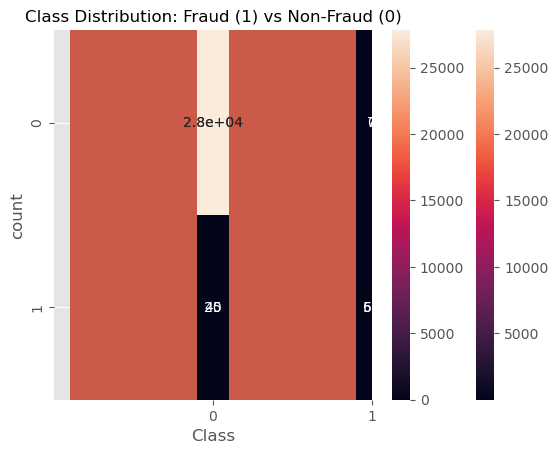

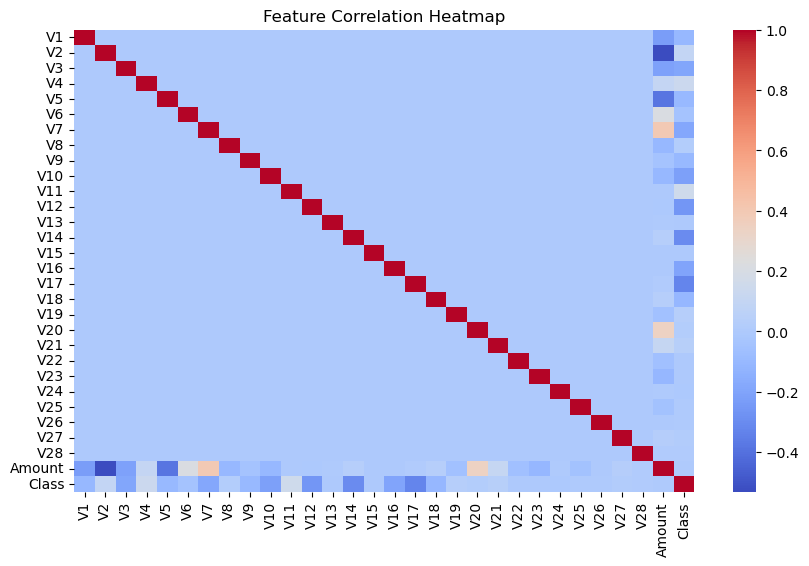

In [59]:
# Check class distribution
sns.countplot(x=y)
plt.title("Class Distribution: Fraud (1) vs Non-Fraud (0)")
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


# Model Training
We'll train and compare Decision Tree, Random Forest, Logistic Regression, and XGBoost.

#  Decision Tree

In [63]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree F1 Score:", f1_score(y_test, dt_pred))

Decision Tree F1 Score: 0.7551020408163265


# Random Forest

In [67]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest F1 Score:", f1_score(y_test, rf_pred))

Random Forest F1 Score: 0.8804347826086957


# Decision Tree Classifier

In [76]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print(f"Decision Tree F1 Score: {f1_score(y_test, y_pred_dt)}")

Decision Tree F1 Score: 0.7437185929648241


# XGBoost Classifier

In [78]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost F1 Score: {f1_score(y_test, y_pred_xgb)}")

XGBoost F1 Score: 0.8571428571428571


# Model Evaluation

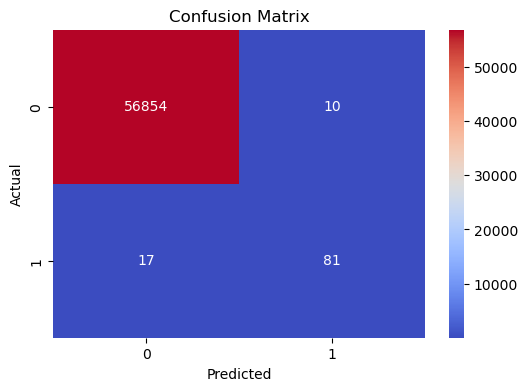

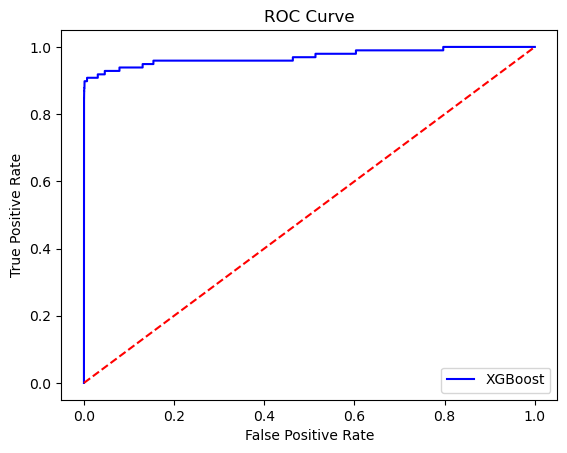

XGBoost AUC Score: 0.9711382618607376


In [80]:
# Confusion Matrix for best model (assume XGBoost is best)
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr, color='blue', label='XGBoost')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_prob_xgb)
print(f"XGBoost AUC Score: {auc_score}")
